# Logistic Regression with non-linear features

## import library

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import ticker, cm

## load training data

In [93]:
fname_data_train    = 'assignment_10_data_train.csv'
fname_data_test     = 'assignment_10_data_test.csv'

data_train          = np.genfromtxt(fname_data_train, delimiter=',')
data_test           = np.genfromtxt(fname_data_test, delimiter=',')

number_data_train   = data_train.shape[0]
number_data_test    = data_test.shape[0]

data_train_point    = data_train[:, 0:2]
data_train_point_x  = data_train_point[:, 0]
data_train_point_y  = data_train_point[:, 1]
data_train_label    = data_train[:, 2]

data_test_point     = data_test[:, 0:2]
data_test_point_x   = data_test_point[:, 0]
data_test_point_y   = data_test_point[:, 1]
data_test_label     = data_test[:, 2]

data_train_label_class_0    = (data_train_label == 0)
data_train_label_class_1    = (data_train_label == 1)

data_test_label_class_0     = (data_test_label == 0)
data_test_label_class_1     = (data_test_label == 1)

data_train_point_x_class_0  = data_train_point_x[data_train_label_class_0]
data_train_point_y_class_0  = data_train_point_y[data_train_label_class_0]

data_train_point_x_class_1  = data_train_point_x[data_train_label_class_1]
data_train_point_y_class_1  = data_train_point_y[data_train_label_class_1]

data_test_point_x_class_0   = data_test_point_x[data_test_label_class_0]
data_test_point_y_class_0   = data_test_point_y[data_test_label_class_0]

data_test_point_x_class_1   = data_test_point_x[data_test_label_class_1]
data_test_point_y_class_1   = data_test_point_y[data_test_label_class_1]

print('shape of point in train data = ', data_train_point.shape)
print('shape of point in test data = ', data_train_point.shape)

print('shape of label in train data = ', data_test_label.shape)
print('shape of label in test data = ', data_test_label.shape)

print('data type of point x in train data = ', data_train_point_x.dtype)
print('data type of point y in train data = ', data_train_point_y.dtype)

print('data type of point x in test data = ', data_test_point_x.dtype)
print('data type of point y in test data = ', data_test_point_y.dtype)


shape of point in train data =  (500, 2)
shape of point in test data =  (500, 2)
shape of label in train data =  (500,)
shape of label in test data =  (500,)
data type of point x in train data =  float64
data type of point y in train data =  float64
data type of point x in test data =  float64
data type of point y in test data =  float64


In [94]:
data_train_point

array([[ 1.13519776e+00, -4.28388638e-03],
       [ 1.11377161e+00,  4.58133671e-01],
       [ 1.72780268e+00,  2.12184711e-01],
       [ 1.95124583e+00,  4.02954242e-01],
       [ 1.12486145e+00,  3.15589788e-01],
       [ 1.97493322e+00,  2.66385515e-01],
       [ 1.59623892e+00,  1.69884250e-01],
       [ 1.38612850e+00,  1.01692049e+00],
       [ 1.70863145e+00,  1.04569430e+00],
       [ 1.43985800e+00,  9.01284857e-01],
       [ 1.26158063e+00,  4.37532043e-01],
       [ 1.69326225e+00,  8.20650514e-01],
       [ 1.64222171e+00,  8.66117578e-01],
       [ 1.74692488e+00,  9.51397236e-01],
       [ 1.23733984e+00,  1.95444477e-01],
       [ 1.43558970e+00,  4.35472819e-01],
       [ 1.64826051e+00,  6.27122237e-01],
       [ 1.21170924e+00,  4.27833288e-01],
       [ 1.62070668e+00,  3.74800382e-01],
       [ 1.44343403e+00,  3.75441398e-01],
       [ 1.17091175e+00,  7.91520297e-01],
       [ 1.48746685e+00,  5.19493341e-01],
       [ 1.11213962e+00,  4.27371429e-01],
       [ 1.

## plot the data

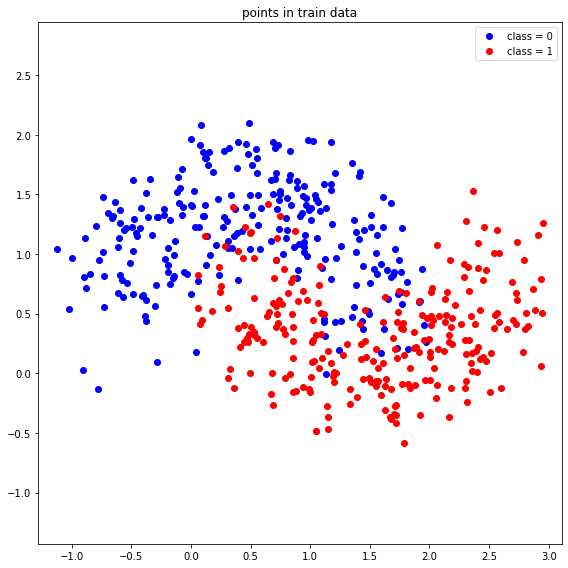

In [95]:
f = plt.figure(figsize=(8,8))   

plt.title('points in train data')
plt.plot(data_train_point_x_class_0, data_train_point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(data_train_point_x_class_1, data_train_point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

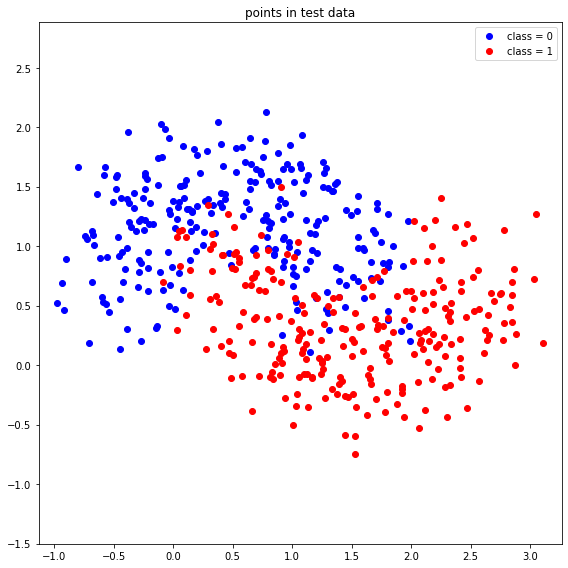

In [96]:
f = plt.figure(figsize=(8,8))   

plt.title('points in test data')
plt.plot(data_test_point_x_class_0, data_test_point_y_class_0, 'o', color='blue', label='class = 0')
plt.plot(data_test_point_x_class_1, data_test_point_y_class_1, 'o', color='red', label='class = 1')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

## define the feature functions

- feature vector is defined by $(1, f_1(x, y), f_2(x, y), \cdots, f_{k-1}(x, y)) \in \mathbb{R}^k$

In [97]:
def compute_feature(point):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    point_x   = point[:, 0]
    point_y   = point[:, 1]
    degree=2
    if point_x.ndim > 0:
        out = [np.ones(point_x.shape[0])]
    else:
        out = [np.ones(1)]

    for i in range(1, degree + 1):
        for j in range(i + 1):
            out.append((point_x ** (i - j)) * (point_y ** j))

    if point_x.ndim > 0:
        return np.stack(out, axis=1)
    else:
        return np.array(out)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return feature

## define the linear regression function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature = $(1, f_1(x, y), \cdots, f_{k-1}(x, y)) \in \mathbb{R}^k$

In [98]:
def compute_linear_regression(theta, feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    value = np.inner(theta,feature)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return value

## define sigmoid function with input

- $z \in \mathbb{R}$

In [99]:
def sigmoid(z):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    value = 1/(1 + np.exp(-z))

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value 

## define the logistic regression function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$

In [100]:
def compute_logistic_regression(theta, feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    y=compute_linear_regression(theta, feature)
    value = sigmoid(y)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return value

## define the residual function

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [101]:
def compute_residual(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    y=compute_logistic_regression(theta, feature)
    residual=-label*np.log(y) - (1 - label)*np.log(1 - y)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return residual

## define the loss function for the logistic regression

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [102]:
def compute_loss(theta, feature, label, alpha):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    loss = (1/number_data_train)*np.sum(compute_residual(theta, feature, label))

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return loss

## define the gradient of the loss with respect to the model parameter $\theta$

- $\theta = (\theta_0, \theta_1, \cdots, \theta_{k-1}) \in \mathbb{R}^k$
- feature $= (1, f_1(x, y), \cdots, f_{k-1}(x, y) \in \mathbb{R}^k$
- label $= l \in \{0, 1\}^k$

In [103]:
def compute_gradient(theta, feature, label, alpha):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    gradient1=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,0])/number_data_train
    gradient2=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,1])/number_data_train
    gradient3=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,2])/number_data_train
    gradient4=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,3])/number_data_train
    gradient5=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,4])/number_data_train
    gradient6=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,5])/number_data_train
    gradient=np.array([gradient1,gradient2,gradient3,gradient4,gradient5,gradient6])
    # gradient1=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,0])/number_data_train
    # gradient2=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,1])/number_data_train
    # gradient3=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,2])/number_data_train
    # gradient4=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,3])/number_data_train
    # gradient5=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,4])/number_data_train
    # gradient6=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,5])/number_data_train
    # gradient7=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,6])/number_data_train
    # gradient8=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,7])/number_data_train
    # gradient9=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,8])/number_data_train
    # gradient10=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,9])/number_data_train
    # gradient11=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,10])/number_data_train
    # gradient12=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,11])/number_data_train
    # gradient13=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,12])/number_data_train
    # gradient14=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,13])/number_data_train
    # gradient15=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,14])/number_data_train
    # gradient16=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,15])/number_data_train
    # gradient17=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,16])/number_data_train
    # gradient18=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,17])/number_data_train
    # gradient19=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,18])/number_data_train
    # gradient20=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,19])/number_data_train
    # gradient21=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,20])/number_data_train
    # gradient22=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,21])/number_data_train
    # gradient23=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,22])/number_data_train
    # gradient24=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,23])/number_data_train
    # gradient25=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,24])/number_data_train
    # gradient26=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,25])/number_data_train
    # gradient27=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,26])/number_data_train
    # gradient28=np.sum((compute_logistic_regression(theta, feature) - label)* feature[:,27])/number_data_train
    # gradient=np.array([gradient1,gradient2,gradient3,gradient4,gradient5,gradient6,gradient7,gradient8,gradient9,
    # gradient10,gradient11,gradient12,gradient13,gradient14,gradient15,gradient16,gradient17,gradient18,
    # gradient19,gradient20,gradient21,gradient22,gradient23,gradient24,gradient25,gradient26,gradient27,gradient28])

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return gradient

## compute the accuracy of the prediction for point with a given model parameter

In [104]:
def compute_accuracy(theta, feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    prob=compute_logistic_regression(theta, feature)
    predicted_labels=np.where(prob>0.5,1,0)
    diff = predicted_labels - label
    accuracy=1.0 - (float(np.count_nonzero(diff)) / len(diff))        

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return accuracy

## initialize the gradient descent algorithm

In [105]:
number_iteration    = 1000 # you can change this value as you want 
learning_rate       = 0.01 # you can change this value as you want 
number_feature      = 6 # you can change this value as you want
alpha               = 1 # you can change this value as you want

theta                       = np.zeros(number_feature)
loss_iteration_train        = np.zeros(number_iteration)
loss_iteration_test         = np.zeros(number_iteration)
accuracy_iteration_train    = np.zeros(number_iteration)
accuracy_iteration_test     = np.zeros(number_iteration)

## run the gradient descent algorithm to optimize the loss function with respect to the model parameter

In [106]:
for i in range(number_iteration):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
 
    theta           = theta-(learning_rate*compute_gradient(theta, compute_feature(data_train_point), data_train_label,alpha))
    loss_train      = compute_loss(theta, compute_feature(data_train_point), data_train_label,alpha)
    loss_test       = compute_loss(theta, compute_feature(data_test_point), data_test_label,alpha)
    accuracy_train  = compute_accuracy(theta, compute_feature(data_train_point), data_train_label)
    accuracy_test   = compute_accuracy(theta, compute_feature(data_test_point), data_test_label)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    loss_iteration_train[i]     = loss_train
    loss_iteration_test[i]      = loss_test
    accuracy_iteration_train[i] = accuracy_train
    accuracy_iteration_test[i]  = accuracy_test

theta_optimal = theta

___

___

## functions for presenting the results

___

___

In [107]:
def function_result_01():

    print("final training accuracy = {:13.10f}".format(accuracy_iteration_train[-1]))

In [108]:
def function_result_02():

    print("final testing accuracy = {:13.10f}".format(accuracy_iteration_test[-1]))

In [109]:
def function_result_03():
    
    plt.figure(figsize=(8,6))
    plt.title('training loss')

    plt.plot(loss_iteration_train, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [110]:
def function_result_04():

    plt.figure(figsize=(8,6))
    plt.title('testing loss')

    plt.plot(loss_iteration_test, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()

In [111]:
def function_result_05():
    
    plt.figure(figsize=(8,6))
    plt.title('training accuracy')

    plt.plot(accuracy_iteration_train, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.show()

In [112]:
def function_result_06():
    
    plt.figure(figsize=(8,6))
    plt.title('testing accuracy')

    plt.plot(accuracy_iteration_test, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')

    plt.tight_layout()
    plt.show()

## plot the linear regression values over the 2-dimensional Euclidean space and superimpose the training data

In [113]:
def function_result_07():

    plt.figure(figsize=(8,8)) 
    plt.title('linear regression values on the training data')
    
    min_x   = np.min(data_train_point_x)
    max_x   = np.max(data_train_point_x)
    min_y   = np.min(data_train_point_y)
    max_y   = np.max(data_train_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) 
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) 

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.plot(data_train_point_x_class_0, data_train_point_y_class_0, '.', color='blue', label='class = 0')
    plt.plot(data_train_point_x_class_1, data_train_point_y_class_1, '.', color='red', label='class = 1')

    plt.legend()
    plt.tight_layout()
    plt.show()

In [114]:
def function_result_08():
    
    plt.figure(figsize=(8,8)) 
    plt.title('linear regression values on the testing data')
    
    min_x   = np.min(data_test_point_x)
    max_x   = np.max(data_test_point_x)
    min_y   = np.min(data_test_point_y)
    max_y   = np.max(data_test_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1)
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) 

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.plot(data_test_point_x_class_0, data_test_point_y_class_0, '.', color='blue', label='class = 0')
    plt.plot(data_test_point_x_class_1, data_test_point_y_class_1, '.', color='red', label='class = 1')

    plt.legend()
    plt.tight_layout()
    plt.show()

## plot the logistic regression values over the 2-dimensional Euclidean space

In [115]:
def function_result_09():

    plt.figure(figsize=(8,8)) 
    plt.title('logistic regression values on the training data')
    
    min_x   = np.min(data_train_point_x)
    max_x   = np.max(data_train_point_x)
    min_y   = np.min(data_train_point_y)
    max_y   = np.max(data_train_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) 
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) 

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++


    plt.plot(data_train_point_x_class_0, data_train_point_y_class_0, '.', color='blue', label='class = 0')
    plt.plot(data_train_point_x_class_1, data_train_point_y_class_1, '.', color='red', label='class = 1')

    plt.legend()
    plt.tight_layout()
    plt.show()

In [116]:
def function_result_10():
    
    plt.figure(figsize=(8,8)) 
    plt.title('logistic regression values on the testing data')

    min_x   = np.min(data_test_point_x)
    max_x   = np.max(data_test_point_x)
    min_y   = np.min(data_test_point_y)
    max_y   = np.max(data_test_point_y)

    X = np.arange(min_x - 0.5, max_x + 0.5, 0.1) 
    Y = np.arange(min_y - 0.5, max_y + 0.5, 0.1) 

    [XX, YY] = np.meshgrid(X, Y)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++


    plt.plot(data_test_point_x_class_0, data_test_point_y_class_0, '.', color='blue', label='class = 0')
    plt.plot(data_test_point_x_class_1, data_test_point_y_class_1, '.', color='red', label='class = 1')

    plt.legend()
    plt.tight_layout()
    plt.show()

___

___

## results

___

___

**************************************************
## [RESULT 01]
**************************************************
final training accuracy =  0.8280000000
**************************************************
## [RESULT 02]
**************************************************
final testing accuracy =  0.8360000000
**************************************************
## [RESULT 03]
**************************************************


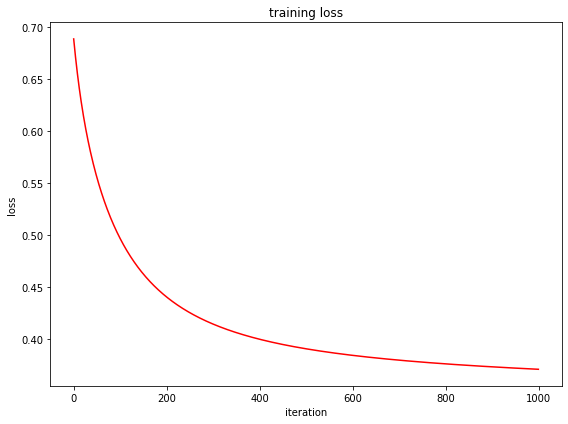

**************************************************
## [RESULT 04]
**************************************************


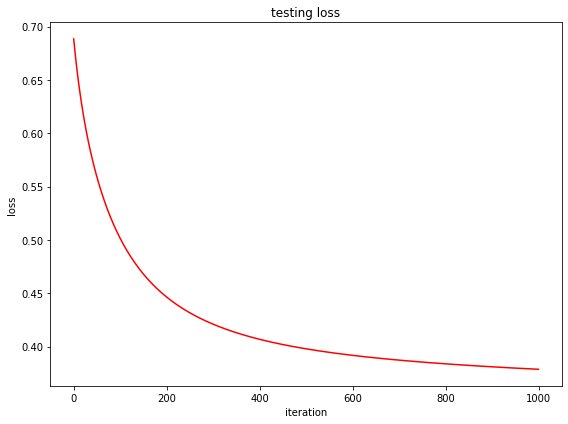

**************************************************
## [RESULT 05]
**************************************************


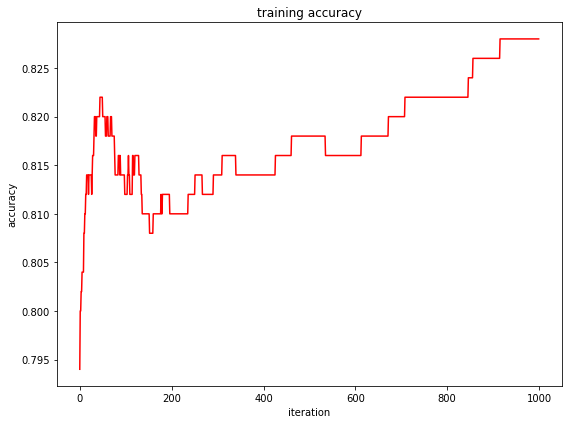

**************************************************
## [RESULT 06]
**************************************************


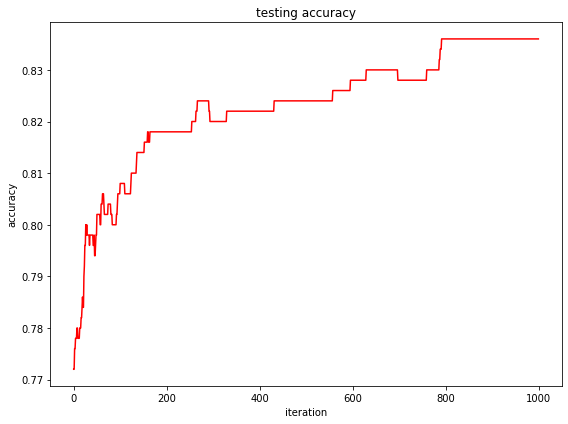

**************************************************
## [RESULT 07]
**************************************************


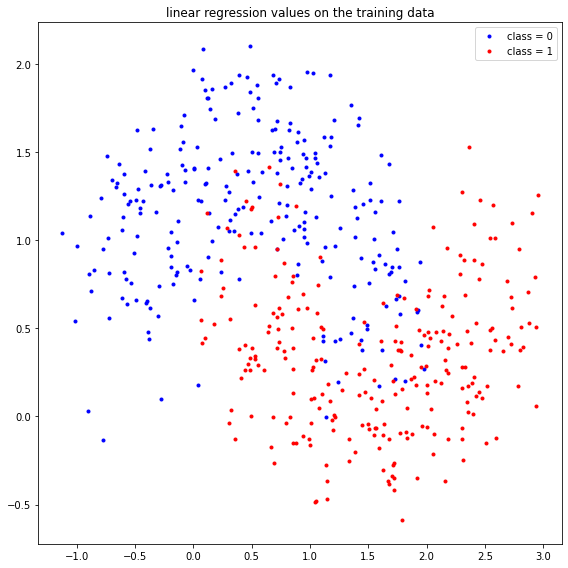

**************************************************
## [RESULT 08]
**************************************************


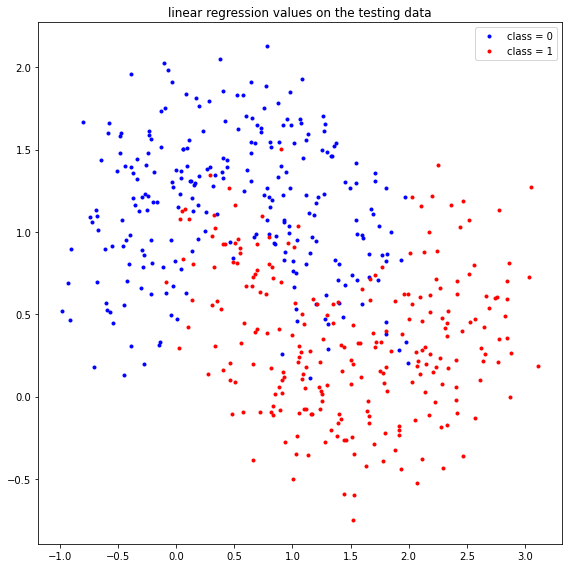

**************************************************
## [RESULT 09]
**************************************************


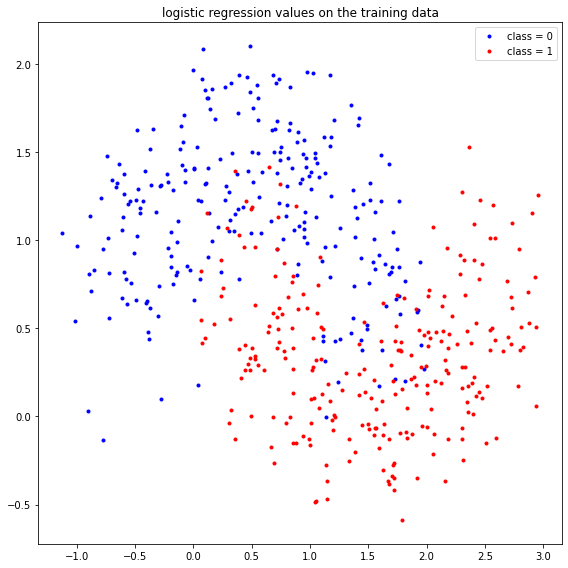

**************************************************
## [RESULT 10]
**************************************************


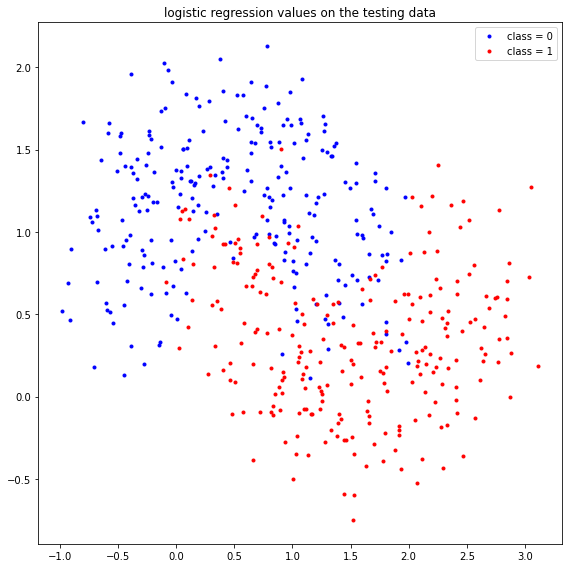

In [117]:
number_result = 10

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)